<a href="https://colab.research.google.com/github/LucasRBerenger/spring-constant-determination/blob/main/helical_spring_constant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Determination of Helical Spring Constant ($k$) with Least Squares Method**

This project aims to determine the spring constant ($k$) using two different physical approaches:
1.  **Static Method:** Based on Hooke's Law.
2.  **Dynamic Method:** Based on Simple Harmonic Motion (SHM) oscillations.

The goal is to transform a traditional physics experiment into a reproducible Python data pipeline using Pandas, NumPy, and Matplotlib. A key feature of this project is the **manual implementation of Linear Regression (Least Squares Method)**, avoiding "black-box" libraries (like scikit-learn) to demonstrate algorithmic proficiency.

# 1. Static Method: Hooke's Law

##Data Acquisition & Units
The experimental data were collected using a precision balance (measured in **grams**) and a ruler (measured in **mm**), necessitating a pre-processing step that converts all values to **S.I. units** (kg and m).

##Theory & Linearization
According to Hooke's Law, the force required to extend a spring is proportional to the distance of extension. By applying **Newton's Second Law** for a system in static equilibrium, the elastic restoring force must balance the gravitational force. Linearized equation ($y = ax + b$):

$$F_{el} = P$$

$$k \cdot \Delta x = m \cdot g$$

$$\underbrace{\Delta x}_{y} = \underbrace{\left( \frac{g}{k} \right)}_{a} \cdot \underbrace{m}_{x} + \underbrace{b}_{\text{offset}}$$

Where:
* $k$: Spring constant (N/m)
* $\Delta x$: Extension (m)
* $m$: Mass (kg)
* $g$: Gravity ($9.81 m/s^2$)

Thus, the slope ($a$) obtained from the regression allows us to determine the spring constant by $k = g/a$. Since $k$ is an indirect measurement derived from the slope $a$, its uncertainty ($\delta k$) is calculated using the derivative method (error propagation):

$$\delta k = \left| \frac{dk}{da} \right| \cdot \delta a$$

Differentiating $k = g \cdot a^{-1}$ with respect to $a$:

$$\frac{dk}{da} = - \frac{g}{a^2} \implies \delta k = \frac{g}{a^2} \cdot \delta a$$

----------------------------------------
a       = 0.309916999 m/kg
delta_a = 0.009306083 m/kg

b       = 0.005070491 m
delta_b = 0.003028013 m
----------------------------------------
y = (0.30992)x + (0.00507)
----------------------------------------
k = 31.653636447 +/- 0.950484680 N/m 

k = 32 +/- 1 N/m
---------------------------------------- 



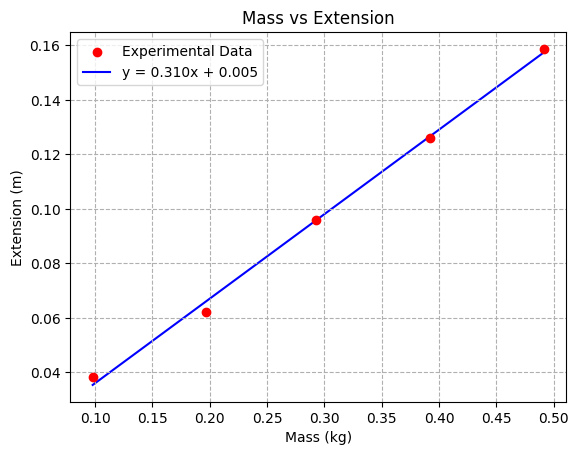

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data structure (colected data + unit conversion)

df = pd.DataFrame({
    'X': [97.9, 197.0, 293.0, 392.1, 491.3],
    'Y': [3.833333333, 6.233333333, 9.6, 12.6, 15.866666667]
})

df['X_kg'] = df['X'] / 1000 # X: mass (g -> kg)
df['Y_m'] = df['Y'] / 100   # Y: extension (cm -> m)

# 2. Least Squares Method (Linear Regression), model: y = ax + b

n = len(df)
mean_x = np.mean(df['X_kg'])
mean_y = np.mean(df['Y_m'])
mean_xy = np.mean(df['X_kg'] * df['Y_m'])
mean_x2 = np.mean(df['X_kg'] ** 2)

delta = mean_x2 - mean_x ** 2

a = (mean_xy - mean_x * mean_y) / delta
b = (mean_x2 * mean_y - mean_x * mean_xy) / delta

S = np.sqrt(np.sum((df['Y_m'] - (a * df['X_kg'] + b)) ** 2)/(n - 2))

delta_a = S / np.sqrt(n * delta)
delta_b = S * np.sqrt((1 / n) * (1 + (mean_x ** 2 / delta)))

g = 9.81  # m/s²
k = g / a # kg/s² or N/m

delta_k = np.abs(-(g / a**2) * delta_a) # delta_k = |dk/da * delta_a|

# 3. Reporting

print('-' * 40)
print(f'a       = {a:.9f} m/kg')
print(f'delta_a = {delta_a:.9f} m/kg\n')
print(f'b       = {b:.9f} m')
print(f'delta_b = {delta_b:.9f} m')
print('-' * 40)
print(f'y = ({a:.5f})x + ({b:.5f})')
print('-' * 40)
print(f'k = {k:.9f} +/- {delta_k:.9f} N/m \n')
print(f'k = {k:.0f} +/- {delta_k:.0f} N/m')
print('-' * 40, '\n')

# 4. Visualization

plt.scatter(df['X_kg'], df['Y_m'], color = 'red', label = 'Experimental Data', zorder = 2) # zorder = higher is on top
x_line = np.linspace(df['X_kg'].min(), df['X_kg'].max()) # np.linspace(start, stop, num), creates an array of uniform spaced numbers. Standart num = 50 (number of points)
y_line = a * x_line + b # y_line(50) for x_line(50)
plt.plot(x_line, y_line, color = 'blue', label = f'y = {a:.3f}x + {b:.3f}', zorder = 1)  # here standart zorder is 2

plt.title('Mass vs Extension')
plt.xlabel('Mass (kg)')
plt.ylabel('Extension (m)')
plt.legend()
plt.grid(linestyle = '--')

plt.show()

# 2. Dynamic Method: Simple Harmonic Motion

## Data Acquisition & Units
The experimental data were obtained by measuring the time for **10 complete oscillations** ($t_{10}$) using a stopwatch (measured in **s**). The period ($T$) was calculated as $T = t_{10} / 10$ to minimize human reaction time errors.

A pre-processing step is then applied to calculate the **squared period** ($T^2$) and to adjust the total mass ($m$) by adding the spring's **effective mass** ($m_{spring}/3$).

## Theory & Linearization
For a mass-spring system in Simple Harmonic Motion (SHM), the period of oscillation depends on the mass and the spring constant. To account for the inertia of the spring itself, we use the effective mass correction. The period is given by:

$$T = 2\pi \sqrt{\frac{m}{k}}$$

To apply the Least Squares Method, we square both sides of the equation to obtain a linear relationship between the squared period ($T^2$) and the mass ($m$). Linearized equation ($y = ax + b$):

$$\underbrace{T^2}_{y} = \underbrace{\left( \frac{4\pi^2}{k} \right)}_{a} \cdot \underbrace{m}_{x} + \underbrace{b}_{\text{offset}}$$

Where:
* $k$: Spring constant (N/m)
* $T^2$: Squared period ($s^2$)
* $m$: Total mass (Added mass + $m_{spring}/3$) [kg]

Thus, the slope ($a$) obtained from the regression represents $4\pi^2/k$, allowing us to determine the spring constant by $k = 4\pi^2/a$.

Since $k$ is derived from the slope $a$, its uncertainty ($\delta k$) is calculated using the derivative method:

$$\delta k = \left| \frac{dk}{da} \right| \cdot \delta a$$

Differentiating $k = 4\pi^2 \cdot a^{-1}$ with respect to $a$:

$$\frac{dk}{da} = - \frac{4\pi^2}{a^2} \implies \delta k = \frac{4\pi^2}{a^2} \cdot \delta a$$

----------------------------------------
a       = 1.183824139 s²/kg
delta_a = 0.032822896 s²/kg

b       = 0.000318498 s²
delta_b = 0.011661583 s²
----------------------------------------
y = (1.18382)x + (0.00032)
----------------------------------------
k = 33.348211371 +/- 0.924617805 kg/s² 

k = 33 +/- 1 kg/s²
---------------------------------------- 



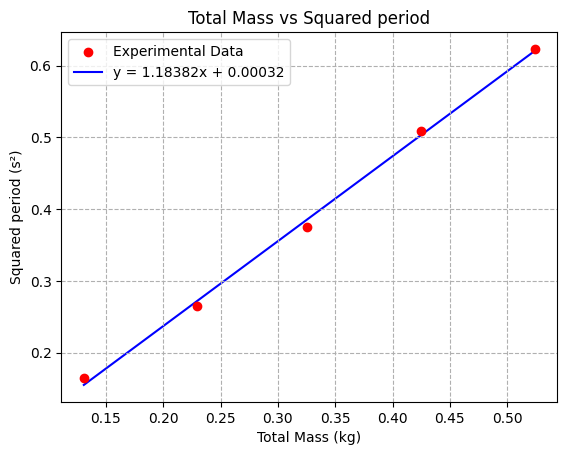

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data structure (colected data + unit conversion)

spring_mass = 98.3
effective_mass = spring_mass / 3

df = pd.DataFrame({
    'X': [97.9 + effective_mass, 197.0 + effective_mass, 293.0 + effective_mass, 392.1 + effective_mass, 491.3 + effective_mass],
    'Y': [0.16434916, 0.26543104, 0.374544, 0.50951044, 0.62346816]
})

df['X_kg'] = df['X'] / 1000 # X: mass (g -> kg)
df['Y_s²'] = df['Y'] # s²

# 2. Least Squares Method (Linear Regression), model: y = ax + b

n = len(df)
mean_x = np.mean(df['X_kg'])
mean_y = np.mean(df['Y_s²'])
mean_xy = np.mean(df['X_kg'] * df['Y_s²'])
mean_x2 = np.mean(df['X_kg'] ** 2)

delta = mean_x2 - mean_x ** 2

a = (mean_xy - mean_x * mean_y) / delta
b = (mean_x2 * mean_y - mean_x * mean_xy) / delta

S = np.sqrt(np.sum((df['Y_s²'] - (a * df['X_kg'] + b)) ** 2)/(n - 2))

delta_a = S / np.sqrt(n * delta)
delta_b = S * np.sqrt((1 / n) * (1 + (mean_x ** 2 / delta)))

k = (4 * np.pi**2) / a # kg/s**2 or N/m

delta_k = np.abs(-(4 * np.pi**2/ a**2) * delta_a) # delta_k = |dk/da * delta_a|

# 3. Reporting

print('-' * 40)
print(f'a       = {a:.9f} s²/kg')
print(f'delta_a = {delta_a:.9f} s²/kg\n')
print(f'b       = {b:.9f} s²')
print(f'delta_b = {delta_b:.9f} s²')
print('-' * 40)
print(f'y = ({a:.5f})x + ({b:.5f})')
print('-' * 40)
print(f'k = {k:.9f} +/- {delta_k:.9f} kg/s² \n')
print(f'k = {k:.0f} +/- {delta_k:.0f} kg/s²')
print('-' * 40, '\n')

# 4. Visualization

plt.scatter(df['X_kg'], df['Y_s²'], color = 'red', label = 'Experimental Data', zorder = 2) # zorder = higher is on top
x_line = np.linspace(df['X_kg'].min(), df['X_kg'].max()) # np.linspace(start, stop, num), creates an array of uniform spaced numbers. Standart num = 50 (number of points)
y_line = a * x_line + b # y_line(50) for x_line(50)
plt.plot(x_line, y_line, color = 'blue', label = f'y = {a:.5f}x + {b:.5f}', zorder = 1)  # here standart zorder is 2

plt.title('Total Mass vs Squared period')
plt.xlabel('Total Mass (kg)')
plt.ylabel('Squared period (s²)')
plt.legend()
plt.grid(linestyle = '--')

plt.show()